In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization with graphics
import seaborn as sns # visualization
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv("vgsales.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [8]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

****DATA CLEANING****

**isna() function used to find missing value and that counts by sum() function.**

In [9]:
data.isna().sum() #Found missing values in datasets and that count by sum() function.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
data.dropna(inplace=True,axis=0) #inplace -> Bool value. Default False. 
                                 #If True, do operation inplace and return None.
                                 #axis=0 drop rows which contain missing values. 
                                 #axis=1 drop columns which contain missing values.

In [11]:
data.isna().sum() 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Let's do Correlation map!**

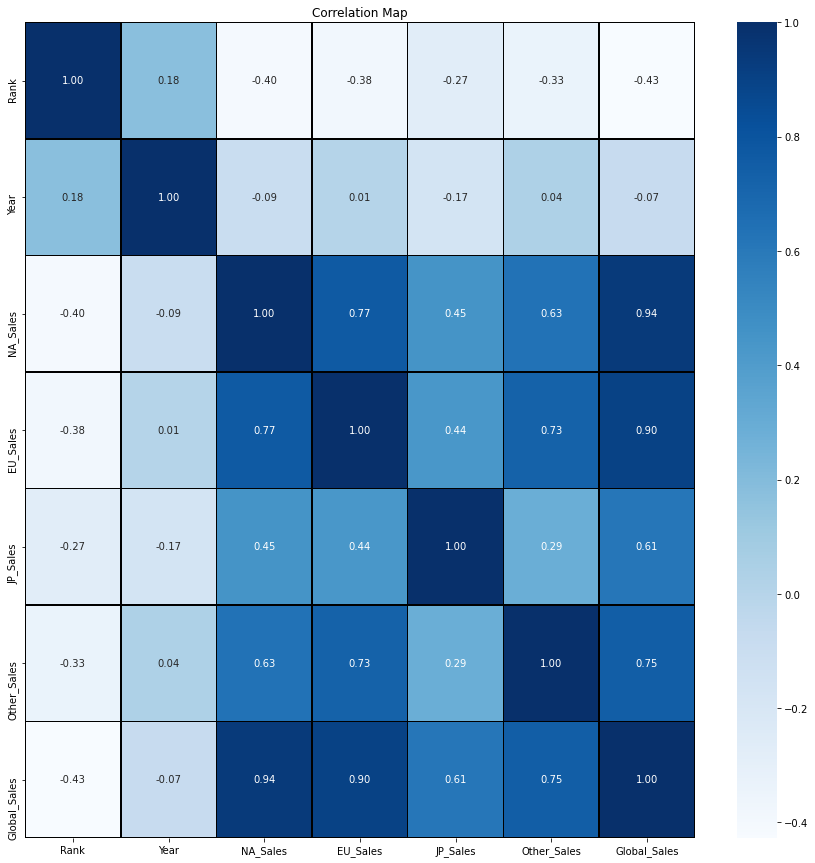

In [13]:
size=[15,15]
plt.figure(figsize=size)
plt.title('Correlation Map')
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.2f',linecolor='black', cmap='Blues')
plt.show()

**Let's use 'Bar plot' to graphics global sales by genre.**

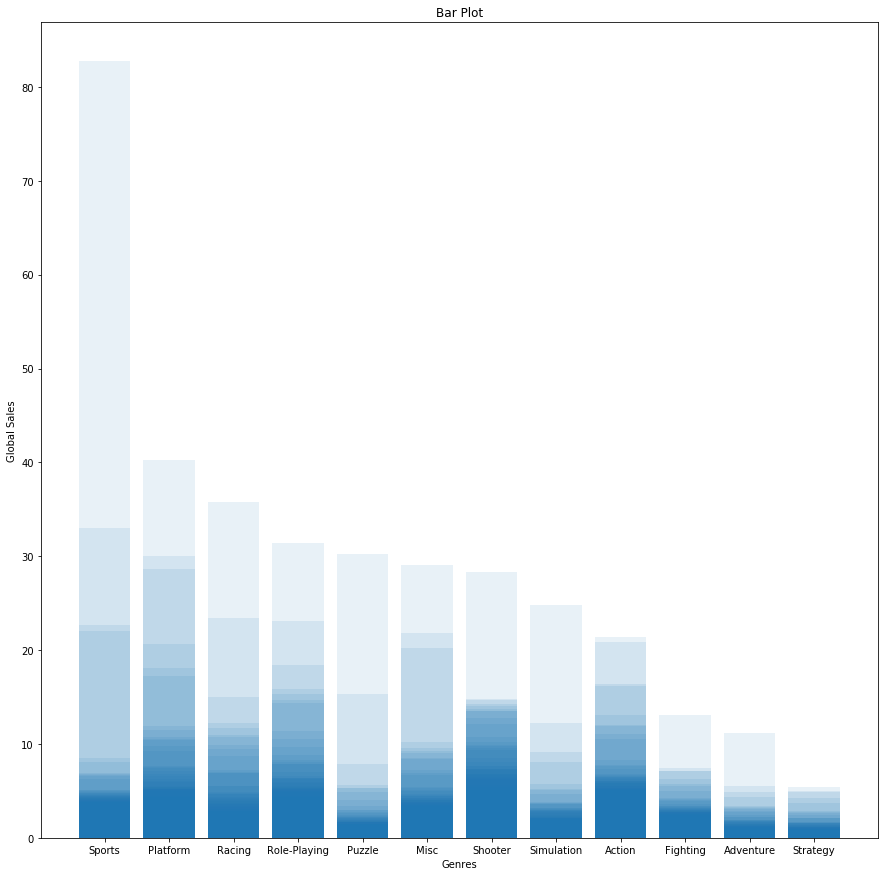

In [12]:
plt.figure(figsize=(15,15))
plt.bar(data.Genre,data.Global_Sales,alpha=0.1)
plt.title('Bar Plot')
plt.xlabel("Genres")
plt.ylabel("Global Sales")
plt.show()

**Let's use 'Scatter plot' to graphics global sales by year.**

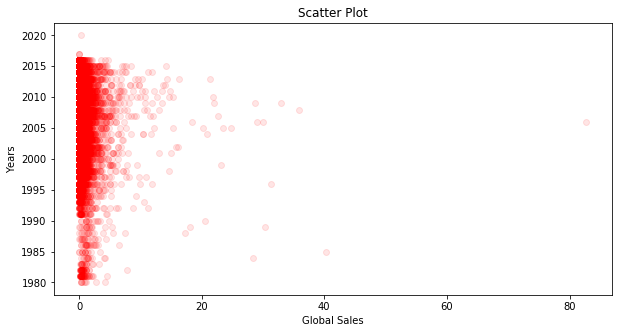

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(data.Global_Sales,data.Year,color="r",alpha=0.1)
plt.title('Scatter Plot')
plt.xlabel("Global Sales")
plt.ylabel("Years")
plt.show()


**Concatenate pandas objects with concat() functions. **

In [14]:
# axis=0 --> for line
# axis=1 --> for column 
dataGenre1=data.groupby("Genre")[['Global_Sales']].mean()
dataGenre2=data.groupby("Genre")[['NA_Sales']].mean()
dataGenre3=data.groupby("Genre")[['EU_Sales']].mean()
dataGenre4=data.groupby("Genre")[['JP_Sales']].mean()

dataGenre = pd.concat([dataGenre1,dataGenre2,dataGenre3,dataGenre4],axis=1)
dataGenre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Action to Strategy
Data columns (total 4 columns):
Global_Sales    12 non-null float64
NA_Sales        12 non-null float64
EU_Sales        12 non-null float64
JP_Sales        12 non-null float64
dtypes: float64(4)
memory usage: 480.0+ bytes


In [15]:
dataGenre

,Global_Sales,NA_Sales,EU_Sales,JP_Sales
Genre,,,,
Action,0.529942,0.265078,0.158868,0.048800
Adventure,0.184137,0.080008,0.050031,0.040808
Fighting,0.531160,0.264043,0.119617,0.104246
Misc,0.468488,0.235421,0.125605,0.063268
Platform,0.947577,0.509703,0.229314,0.149314
Puzzle,0.424930,0.214053,0.088632,0.099439
Racing,0.593273,0.291371,0.192906,0.046212
Role-Playing,0.628456,0.222109,0.127599,0.238293
Shooter,0.800468,0.448643,0.242161,0.029782


**Add a new column. This column indicates that the sales status is successful or unsuccessful.**

In [16]:
dataGenre['Sales_Status']=['Successful' if(i>0.5) else 'Unsuccessful' for i in dataGenre['Global_Sales']]
dataGenre

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Sales_Status
Genre,,,,,
Action,0.529942,0.265078,0.158868,0.048800,Successful
Adventure,0.184137,0.080008,0.050031,0.040808,Unsuccessful
Fighting,0.531160,0.264043,0.119617,0.104246,Successful
Misc,0.468488,0.235421,0.125605,0.063268,Unsuccessful
Platform,0.947577,0.509703,0.229314,0.149314,Successful
Puzzle,0.424930,0.214053,0.088632,0.099439,Unsuccessful
Racing,0.593273,0.291371,0.192906,0.046212,Successful
Role-Playing,0.628456,0.222109,0.127599,0.238293,Successful
Shooter,0.800468,0.448643,0.242161,0.029782,Successful


**How many games were produced for each platform?**

In [17]:
dataPlatform=data.groupby("Platform")[['Platform']].count()
dataPlatform.rename(columns={'Platform':'Counted'})


,Counted
Platform,
2600,116
3DO,3
3DS,499
DC,52
DS,2131
GB,97
GBA,786
GC,542
GEN,27


In [18]:
print(data['Genre'].value_counts(dropna=False)) #value_counts() -> Boolean, default True.
                                                #Don't include counts of NaN

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64


In [19]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
data['Sales_Status']=['Successful' if(i>0.5) else 'Unsuccessful' for i in data['Global_Sales']]
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


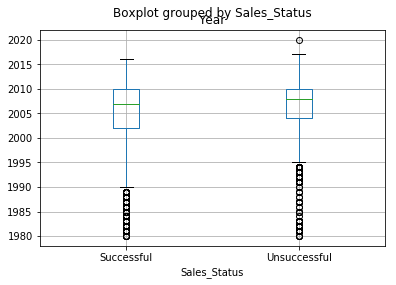

In [21]:
data.boxplot(column='Year',by='Sales_Status')

In [22]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


**TIDY DATA**

In [23]:
data_new = data.head()
data_new

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


In [24]:
melted = pd.melt(frame= data_new, id_vars='Name', value_vars=['Genre','Publisher'])
melted

,Name,variable,value
0,Wii Sports,Genre,Sports
1,Super Mario Bros.,Genre,Platform
2,Mario Kart Wii,Genre,Racing
3,Wii Sports Resort,Genre,Sports
4,Pokemon Red/Pokemon Blue,Genre,Role-Playing
5,Wii Sports,Publisher,Nintendo
6,Super Mario Bros.,Publisher,Nintendo
7,Mario Kart Wii,Publisher,Nintendo
8,Wii Sports Resort,Publisher,Nintendo
9,Pokemon Red/Pokemon Blue,Publisher,Nintendo


PIVOTING DATA (Reverse of melting)

In [25]:
melted.pivot(index='Name', columns='variable',values='value')

variable,Genre,Publisher
Name,,
Mario Kart Wii,Racing,Nintendo
Pokemon Red/Pokemon Blue,Role-Playing,Nintendo
Super Mario Bros.,Platform,Nintendo
Wii Sports,Sports,Nintendo
Wii Sports Resort,Sports,Nintendo


**CONCATENATING DATA**

In [26]:
data1 = data.head()
data2 = data.tail()
concat_data_row = pd.concat([data1,data2], axis=0, ignore_index=True)
concat_data_row

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful
5,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Unsuccessful
6,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Unsuccessful
7,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Unsuccessful
8,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Unsuccessful
9,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Unsuccessful


In [27]:
data1=data['Genre'].head()
data2=data['Sales_Status'].head()
concat_data_column = pd.concat([data1,data2], axis=1, ignore_index=True)
concat_data_column

,0,1
0,Sports,Successful
1,Platform,Successful
2,Racing,Successful
3,Sports,Successful
4,Role-Playing,Successful


**DATA TYPES**

In [28]:
data['Year'] = data['Year'].astype('int') #convert float to int

**MISSING DATA AND TESTING WİTH ASSERT**

In [29]:
data['Genre'].value_counts(dropna = False)

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [30]:
#assert 1==1 # return nothing because it is true
#assert 1==2 # return error because it is false

In [31]:
assert data['Genre'].notnull().all() #returns nothing because we drop missing values
assert data.columns[1] == 'Name'

**---> zip() Function**

In [32]:
country = ['Greece', 'Italy']
city = ['Athen', 'Milano']
title = ['country', 'city']
list_col = [country,city]
zipped = list(zip(title, list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,city
0,Greece,Athen
1,Italy,Milano


In [33]:
#broadcasting
df['income']=1000
df

,country,city,income
0,Greece,Athen,1000
1,Italy,Milano,1000


**VISUAL EXPLORATORY DATA ANALYSIS**

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

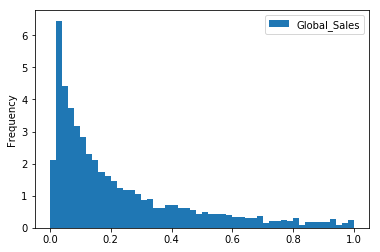

In [34]:
data.plot(kind='hist', y='Global_Sales', bins=50, range=(0,1), normed=True)
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

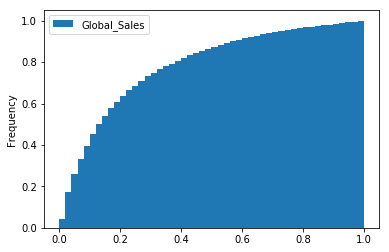

In [35]:
data.plot(kind='hist', y='Global_Sales', bins=50, range=(0,1), normed=True, cumulative=True) # cumulative=True -> 
plt

In [36]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


**INDEXING PANDAS TIME SERIES**

In [37]:
import warnings
warnings.filterwarnings('ignore')

data_indexing = data.head()
date_list=['1997-01-02', '1997-05-12', '1997-09-23', '1997-10-12', '1997-12-27']
date_object = pd.to_datetime(date_list)
data_indexing['date']=date_object

data_indexing = data_indexing.set_index('date')
data_indexing

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
date,,,,,,,,,,,,
1997-01-02,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1997-05-12,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
1997-09-23,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
1997-10-12,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
1997-12-27,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


In [38]:
print(data_indexing.loc['1997-01-02'])

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Sales_Status    Successful
Name: 1997-01-02 00:00:00, dtype: object


In [39]:
print(data_indexing.loc['1997-01-02':'1997-12-27'])

            Rank                      Name Platform  Year         Genre  \
date                                                                      
1997-01-02     1                Wii Sports      Wii  2006        Sports   
1997-05-12     2         Super Mario Bros.      NES  1985      Platform   
1997-09-23     3            Mario Kart Wii      Wii  2008        Racing   
1997-10-12     4         Wii Sports Resort      Wii  2009        Sports   
1997-12-27     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   

           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
date                                                                            
1997-01-02  Nintendo     41.49     29.02      3.77         8.46         82.74   
1997-05-12  Nintendo     29.08      3.58      6.81         0.77         40.24   
1997-09-23  Nintendo     15.85     12.88      3.79         3.31         35.82   
1997-10-12  Nintendo     15.75     11.01      3.28         2.96      

**RESAMPLING PANDAS TIME SERIES**

In [40]:
data_indexing.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Status
date,,,,,,,,,,,,
1997-01-02,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Successful
1997-05-12,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Successful
1997-09-23,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Successful
1997-10-12,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Successful
1997-12-27,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Successful


In [41]:
data_indexing.resample("M").mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
date,,,,,,,
1997-01-31,1.0,2006.0,41.49,29.02,3.77,8.46,82.74
1997-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-31,2.0,1985.0,29.08,3.58,6.81,0.77,40.24
1997-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-30,3.0,2008.0,15.85,12.88,3.79,3.31,35.82


In [42]:
data_indexing.resample("M").mean().interpolate("linear")

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
date,,,,,,,
1997-01-31,1.00,2006.00,41.4900,29.020,3.770,8.4600,82.740
1997-02-28,1.25,2000.75,38.3875,22.660,4.530,6.5375,72.115
1997-03-31,1.50,1995.50,35.2850,16.300,5.290,4.6150,61.490
1997-04-30,1.75,1990.25,32.1825,9.940,6.050,2.6925,50.865
1997-05-31,2.00,1985.00,29.0800,3.580,6.810,0.7700,40.240
1997-06-30,2.25,1990.75,25.7725,5.905,6.055,1.4050,39.135
1997-07-31,2.50,1996.50,22.4650,8.230,5.300,2.0400,38.030
1997-08-31,2.75,2002.25,19.1575,10.555,4.545,2.6750,36.925
1997-09-30,3.00,2008.00,15.8500,12.880,3.790,3.3100,35.820
